In [1]:
!pip install dionysus
!pip install zarr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dionysus: filename=dionysus-2.0.8-cp38-cp38-linux_x86_64.whl size=342681 sha256=3d843de810e4cccd41671f0aabb1066b669423840b27585012d7998b6b69e347
  Stored in directory: /root/.cache/pip/wheels/0e/6a/ce/a54c9248873852edfaf8e6e801db84c2d2c64f797fc07a68da
Successfully built dionysus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=151c18a7f40bba2a4a14f15706c784be19a1a8d5341d65c5b355f5335a32dda1
  Stored in directory: /ro

In [2]:
from google.colab import drive
from google.colab import files
import os

drive.mount('/content/drive',force_remount=True)
os.chdir("/content/drive/My Drive/NASA/Fire Detection/Test Data")
!ls -ltr

Mounted at /content/drive
total 24
drwx------ 2 root root 4096 Jan 19 03:20 Tile_1_33
drwx------ 2 root root 4096 Jan 19 03:21 Tile_5_37
drwx------ 2 root root 4096 Jan 21 00:56 Tile_0_8
drwx------ 2 root root 4096 Jan 23 23:39 Tile_2_6
drwx------ 2 root root 4096 Jan 23 23:40 Tile_17_32
drwx------ 2 root root 4096 Jan 25 01:24 Tile_13_37


In [3]:
import zarr
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import dionysus as d
import matplotlib.pyplot as plt
sns.set_theme()

In [14]:
fname2 = 'Tile_17_32'

rawFileList = os.listdir(fname2)
print (rawFileList)

['Tile_17_32.csv', 'Tile_17_32_s20192200236197.zarr', 'Tile_17_32_s20192201851196.zarr', 'Tile_17_32_s20192192041196.zarr', 'Tile_17_32_s20192210221197.zarr', 'Tile_17_32_s20192192006196.zarr', 'Tile_17_32_s20192210116197.zarr', 'Tile_17_32_s20192210121197.zarr', 'Tile_17_32_s20192201931196.zarr', 'Tile_17_32_s20192200056197.zarr', 'Tile_17_32_s20192192026196.zarr', 'Tile_17_32_s20192191956196.zarr', 'Tile_17_32_s20192181816196.zarr', 'Tile_17_32_s20192191931196.zarr', 'Tile_17_32_s20192182151196.zarr', 'Tile_17_32_s20192191821196.zarr', 'Tile_17_32_s20192181926196.zarr', 'Tile_17_32_s20192182036196.zarr']


In [15]:
usefulChannel = [6, 13]
tileList = rawFileList[1:]

channelDiff = []
for i in range(len(tileList)):
    channel7 = np.array(zarr.open(fname2 + '//' + tileList[i])[:, :, usefulChannel[0]])
    channel14 = np.array(zarr.open(fname2 + '//' + tileList[i])[:, :, usefulChannel[1]])
    channel7 = (channel7 - np.min(channel7)) / (np.max(channel7) - np.min(channel7)) # normalize data
    channel14 = (channel14 - np.min(channel14)) / (np.max(channel14) - np.min(channel14))
    channelDiff.append(channel7 - channel14)


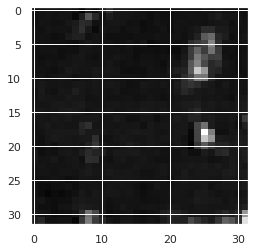

In [21]:
test = channelDiff[4]

plt.gray()
plt.imshow(test)

plt.show()

In [ ]:
print (len(channelDiff))

17


In [ ]:
dfLabel = pd.read_csv(fname2 + '//' + rawFileList[0])
dfLabel['name'] = dfLabel.apply(lambda row: row.scene.split('_')[3], axis=1)

In [ ]:
channelNum = [0, 1, 2]

print (channelDiff[1])

[[-0.11685833 -0.11403939 -0.09025728 ... -0.11048171 -0.11042705
  -0.07640937]
 [-0.07348129 -0.08513972 -0.10719769 ... -0.13836894 -0.133224
  -0.10987963]
 [-0.11365633 -0.11685833 -0.12583487 ... -0.16086487 -0.14882338
  -0.16187747]
 ...
 [-0.15298294 -0.14055805 -0.14635993 ... -0.32479463 -0.34354117
  -0.19734528]
 [-0.12274223 -0.15229888 -0.1405856  ... -0.30054732 -0.31297222
  -0.31261641]
 [-0.10714283 -0.1442803  -0.16590047 ... -0.27974803 -0.26174052
  -0.30834707]]


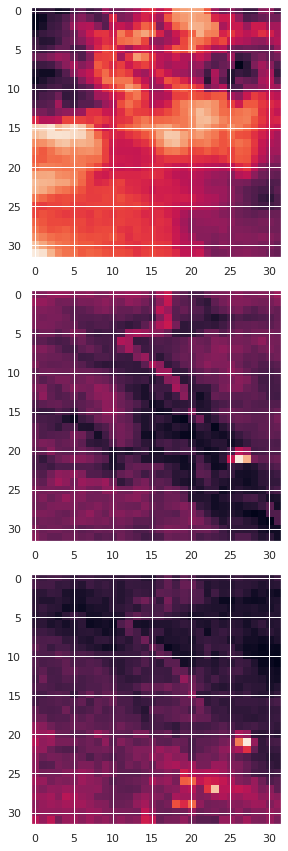

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

for i in range(3):
    axs[i].imshow(channelDiff[channelNum[i]])
    #seriesStartTime = timeSeriesNameNew[i].split('_')[3].split('.')[0]
    #label = dfLabel.loc[dfLabel['name'] == seriesStartTime, 'fire'].iloc[0]
    #axs[i, j].title.set_text('Label {}'.format(label))
fig.tight_layout()
plt.show()

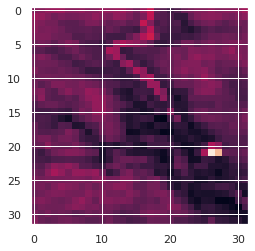

In [ ]:
plt.imshow(channelDiff[6])
plt.show()